# Regression Model for Wine Quality

## 1. Introduction and Project Aims

This project will look at the physicochemical and sensory variables of red and white wine variants of the Portuguese "Vinho Verde" wine.

It will use the follwoing data to develop a regression model to predict the quality of the wine based on these variables.

  **Data citation:**
  
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

## 2. The problem

1. Perform any cleaning, feature engineering, and EDA you deem necessary.
2. Addess any missing data.
3. Identify features that can predict quality
4. Train a model on 80% of the data and evaluate its performance on the remaining 20%.
6. Characterise your model. How well does it perform? What are the best estimates of quality?

### 3. Data Processing and Cleaning

Explore the dataset, and check whether any data cleaning is required

In [91]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn import linear_model
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns


main_path = Path(r'C:\Users\user\Documents\Data Science Upskilling\Wine Model\Data')
red_wine_data = pd.read_csv(main_path / 'winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv(main_path / 'winequality-white.csv', delimiter=';')

Exploring the red wine data set

In [92]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [93]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As can be seen all the variables in the dataset are numerical and non-null. No data needs to be removed at this stage. Let's check if there are any duplicates in the dataset.

In [94]:
red_wine_data['duplicated_row'] = red_wine_data.duplicated()
red_wine_data.loc[red_wine_data['duplicated_row']==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 1596
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         240 non-null    float64
 1   volatile acidity      240 non-null    float64
 2   citric acid           240 non-null    float64
 3   residual sugar        240 non-null    float64
 4   chlorides             240 non-null    float64
 5   free sulfur dioxide   240 non-null    float64
 6   total sulfur dioxide  240 non-null    float64
 7   density               240 non-null    float64
 8   pH                    240 non-null    float64
 9   sulphates             240 non-null    float64
 10  alcohol               240 non-null    float64
 11  quality               240 non-null    int64  
 12  duplicated_row        240 non-null    bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 24.6 KB


As we can see there are 224 duplicated rows. As there is no unique idea in the dataset, it is not clear whether these duplicates are by chance and are unique observations or not. For now we will remove them.

In [95]:
cleaned_red_wine_data = red_wine_data.loc[red_wine_data['duplicated_row']==False].copy()
cleaned_red_wine_data = cleaned_red_wine_data.drop(columns='duplicated_row')
cleaned_red_wine_data.count()

fixed acidity           1359
volatile acidity        1359
citric acid             1359
residual sugar          1359
chlorides               1359
free sulfur dioxide     1359
total sulfur dioxide    1359
density                 1359
pH                      1359
sulphates               1359
alcohol                 1359
quality                 1359
dtype: int64

### 4. EDA

Let's look at the distribution of the variables.

<function matplotlib.pyplot.show(close=None, block=None)>

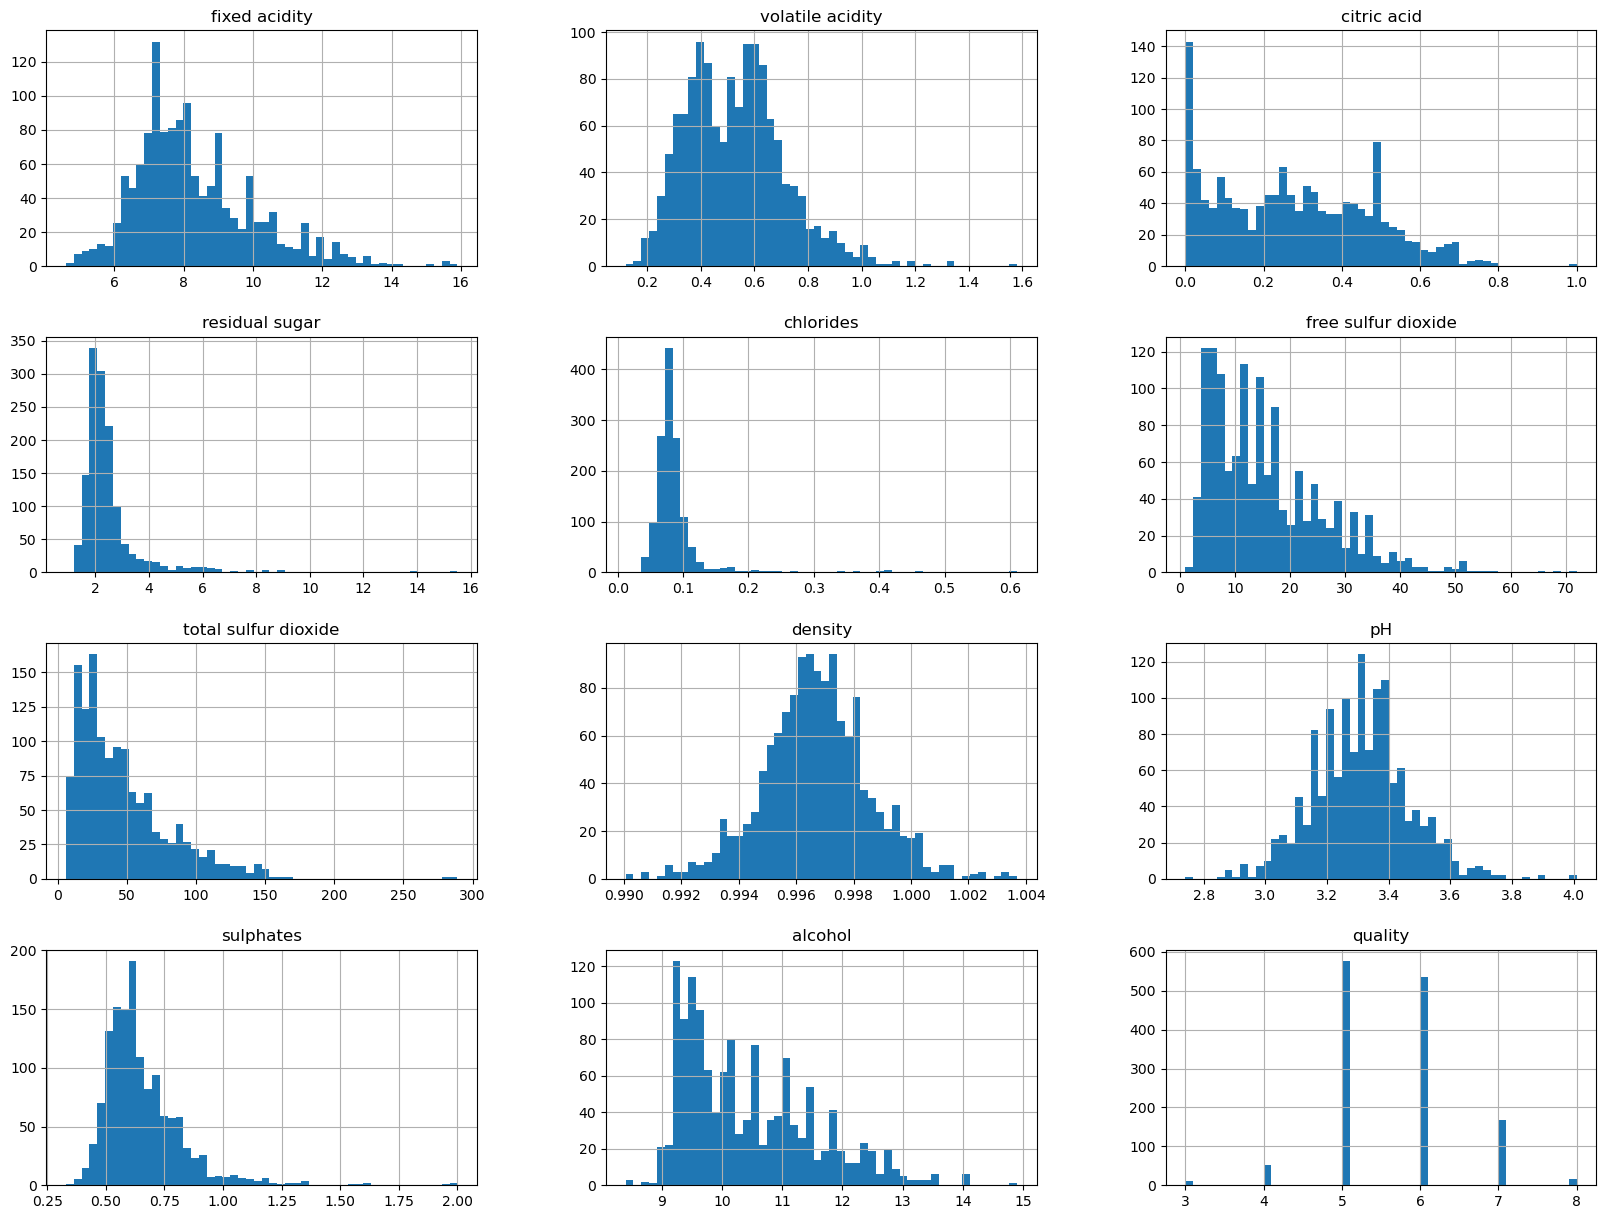

In [96]:
cleaned_red_wine_data.hist(bins=50, figsize=(20,15))
plt.show

A few of the variables are tail heavy and so may need to scale or look at the log of them within the modelling. The quality variables our dependent variable here, looks like it only ranges from 3-8 and doesn't have an even split across the range. When creating the train test split of the data may need to look at stratified samples so that the model can be trained across the full range of data quality.

Now let's look at the correlation between the variables.

In [97]:
corr_matrix = cleaned_red_wine_data.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

Can see clearly that the alcohol content of the wine is strongly correlated to the quality, as is the volatie acidity. Let's see a matrix of the correlation across all the other variables

<AxesSubplot:>

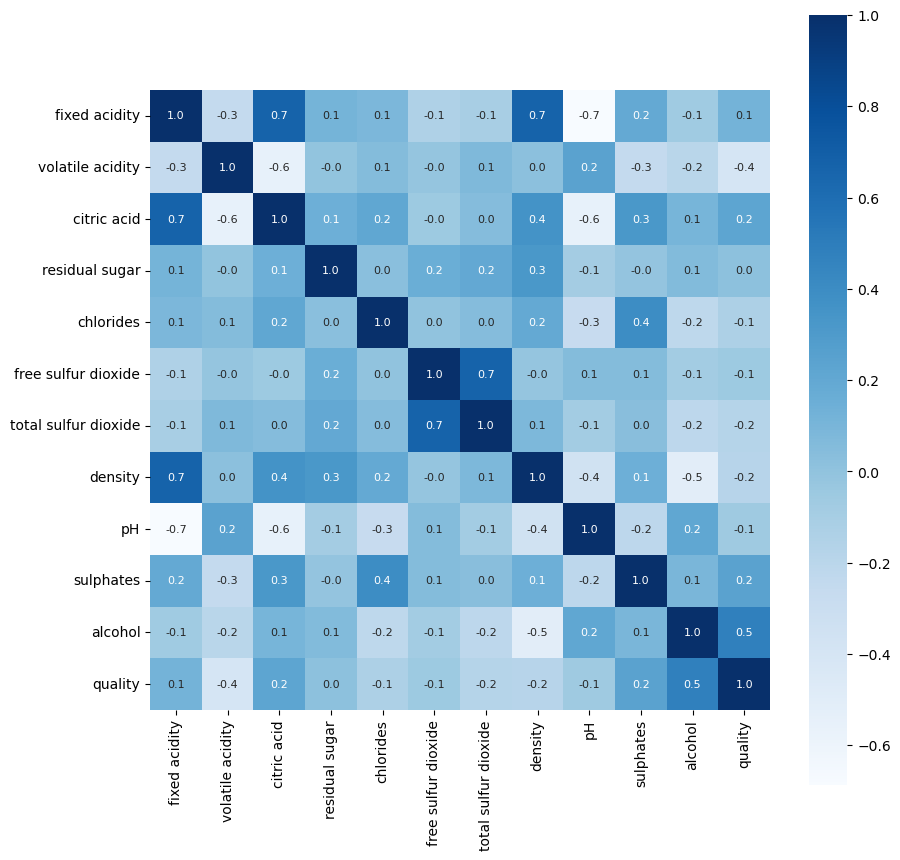

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

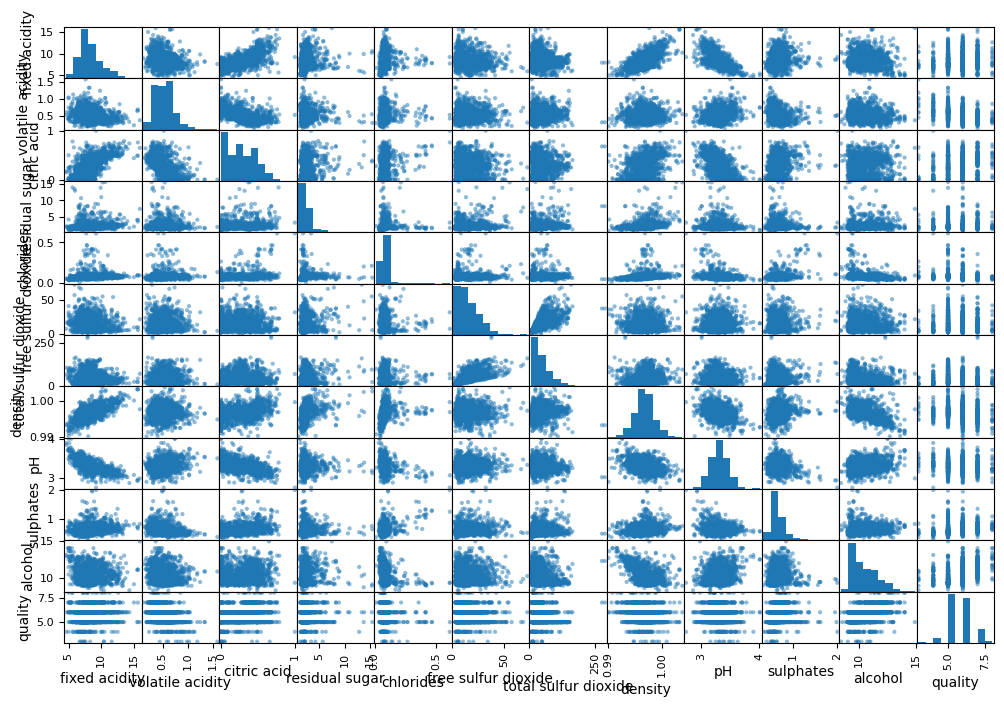

In [100]:
pd.plotting.scatter_matrix(cleaned_red_wine_data, figsize=(12,8))

As you can see from the histograms above that the alcohol and sulphates variables are tail heavy, so will take the log of these to include in the model.

In [101]:
cleaned_red_wine_data['log_alcohol'] = np.log(cleaned_red_wine_data['alcohol'])
cleaned_red_wine_data['log_sulphates'] = np.log(cleaned_red_wine_data['sulphates'])
cleaned_red_wine_data['log_fixed_acidity'] = np.log(cleaned_red_wine_data['fixed acidity'])
cleaned_red_wine_data['log_chlorides'] = np.log(cleaned_red_wine_data['chlorides'])
cleaned_red_wine_data['log_total sulfur dioxide'] = np.log(cleaned_red_wine_data['total sulfur dioxide'])
cleaned_red_wine_data['log_residual sugar'] = np.log(cleaned_red_wine_data['residual sugar'])

cleaned_red_wine_data.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,log_alcohol,log_sulphates,log_fixed_acidity,log_chlorides,log_total sulfur dioxide,log_residual sugar
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.240710,-0.579818,2.001480,-2.577022,3.526361,0.641854
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.282382,-0.385662,2.054124,-2.322788,4.204693,0.955511
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.282382,-0.430783,2.054124,-2.385967,3.988984,0.832909
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2.282382,-0.544727,2.415914,-2.590267,4.094345,0.641854
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,2.240710,-0.579818,2.001480,-2.590267,3.688879,0.587787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,2.251292,-0.198451,1.916923,-2.688248,3.637586,0.641854
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.351375,-0.544727,1.824549,-2.407946,3.784190,0.693147
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2.415914,-0.274437,1.774952,-2.780621,3.931826,0.788457
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.322388,-0.342490,1.774952,-2.590267,3.784190,0.693147


<function matplotlib.pyplot.show(close=None, block=None)>

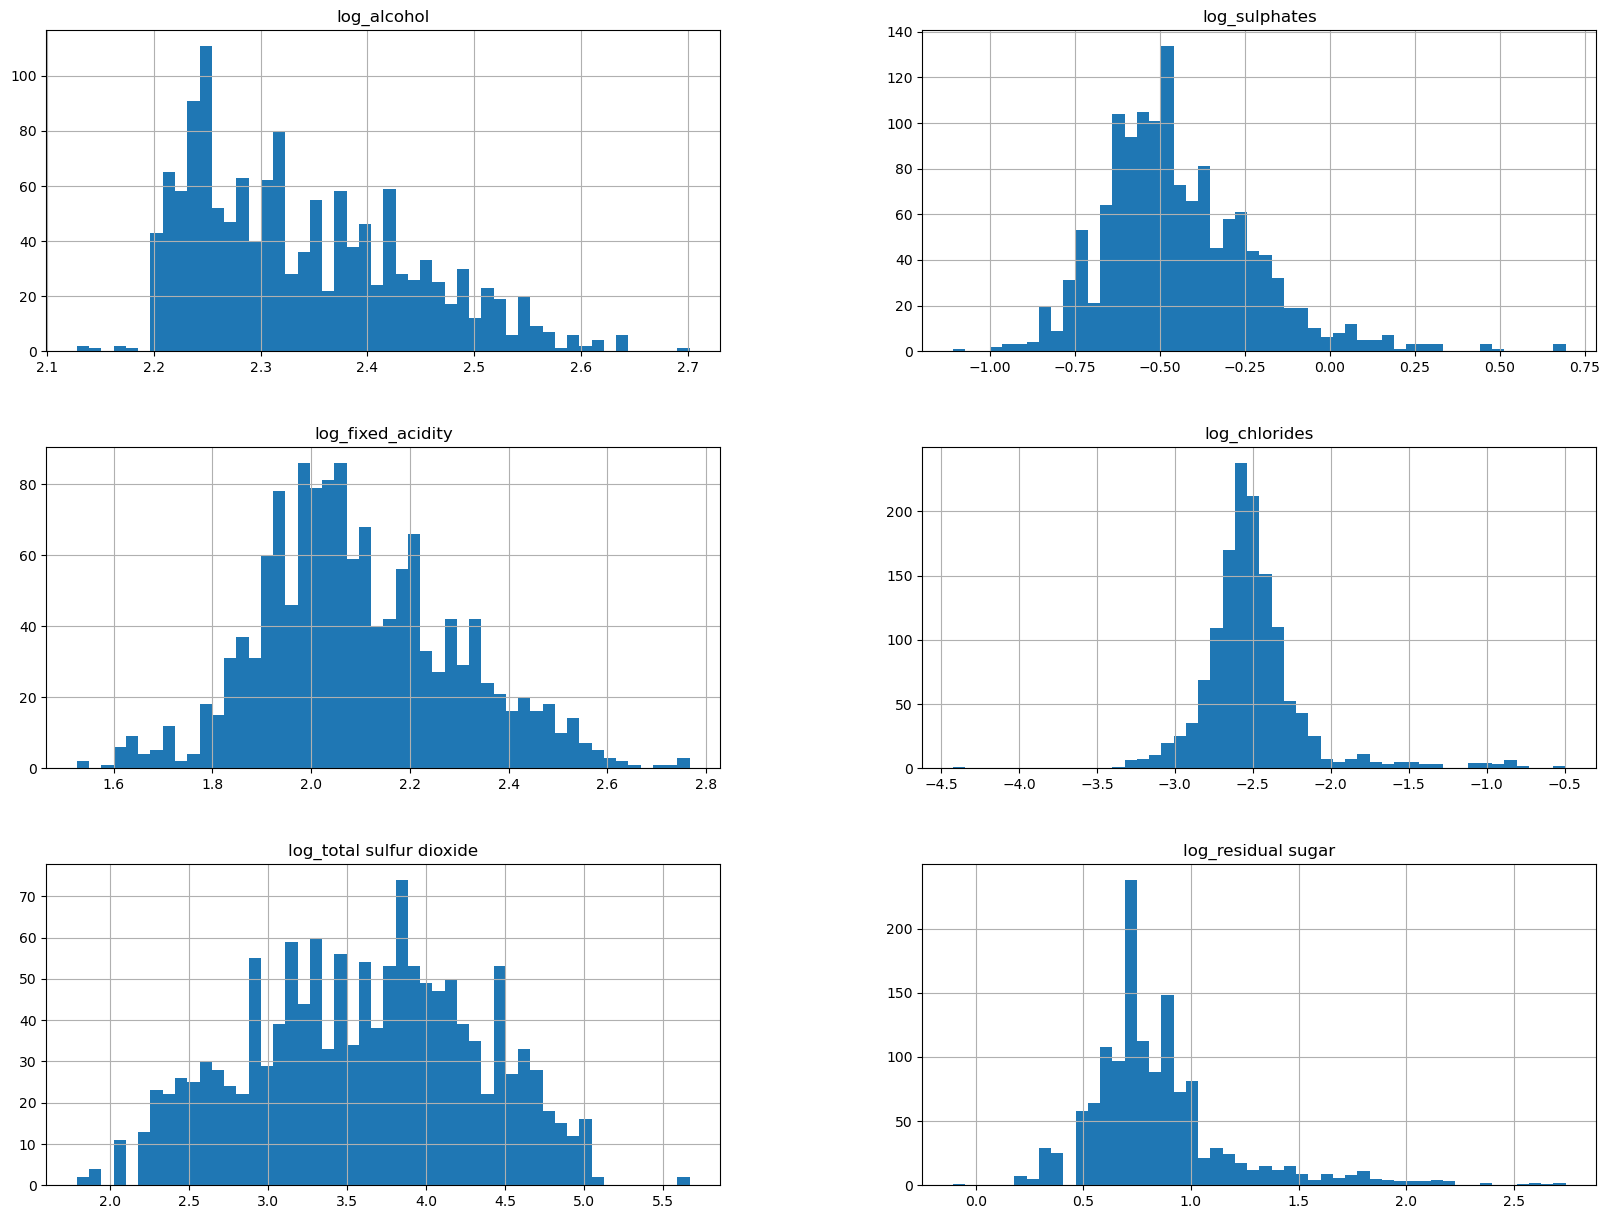

In [102]:
cleaned_red_wine_data[['log_alcohol', 'log_sulphates', 'log_fixed_acidity', 'log_chlorides', 'log_total sulfur dioxide', 'log_residual sugar']].hist(bins=50, figsize=(20,15))
plt.show

Now they look ready to include in the model.

### 5. Model Preparation

Split the data into training and test sets

In [106]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)
red_wine_modelling_data = train_model_1.drop(columns=['quality', 'alcohol', 'sulphates', 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'residual sugar']).to_numpy()
red_wine_labels = train_model_1[['quality']].to_numpy()

Create the model

In [107]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(red_wine_modelling_data, red_wine_labels)

LinearRegression()

Now let's test it's performance

In [108]:
quality_predictions = lin_reg.predict(test_model_1.drop(columns=['quality', 'alcohol', 'sulphates', 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'residual sugar']).to_numpy())

lin_mse = mean_squared_error(test_model_1[['quality']].to_numpy(), quality_predictions)
lin_rmse = np.sqrt(lin_mse)
r_score = r2_score(test_model_1[['quality']].to_numpy(), quality_predictions)
print(f'R^2 score: {r_score}')
print(f'RMSE score: {lin_rmse}')

R^2 score: 0.4086837002699495
RMSE score: 0.6471957713528218


Can see from the above RMSE the model isn't doing badly, but the R^2 is low, now we need to check whether further data cleaning is required, or question whether a linear regression is the right approach. For now lets look to see if there are any outliers.

First check if the model performs better without the logged terms

In [111]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)
red_wine_modelling_data = train_model_1.drop(columns=['quality', 'log_alcohol', 'log_sulphates', 'log_fixed_acidity', 'log_chlorides', 'log_total sulfur dioxide', 'log_residual sugar']).to_numpy()
red_wine_labels = train_model_1[['quality']].to_numpy()

lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(red_wine_modelling_data, red_wine_labels)

quality_predictions = lin_reg.predict(test_model_1.drop(columns=['quality', 'alcohol', 'sulphates', 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'residual sugar']).to_numpy())

lin_mse = mean_squared_error(test_model_1[['quality']].to_numpy(), quality_predictions)
lin_rmse = np.sqrt(lin_mse)
r_score = r2_score(test_model_1[['quality']].to_numpy(), quality_predictions)
print(f'R^2 score: {r_score}')
print(f'RMSE score: {lin_rmse}')

R^2 score: -669.810502344616
RMSE score: 21.798452944481923


The model definitely performs better with the logged terms. Now let's check for data outliers

### 6. Extra Data Cleaning